In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [3]:
img = plt.imread('cropped.tif')

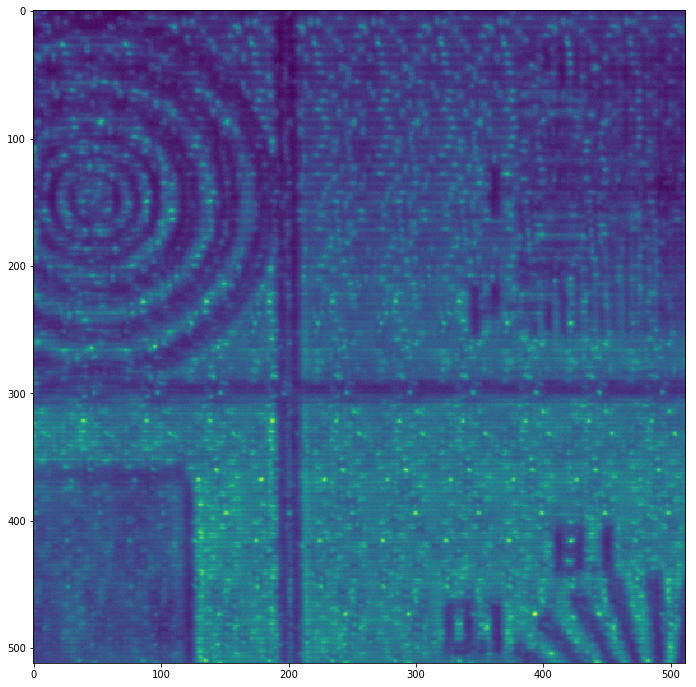

In [5]:
plt.figure(figsize=[12,12])
plt.imshow(img)

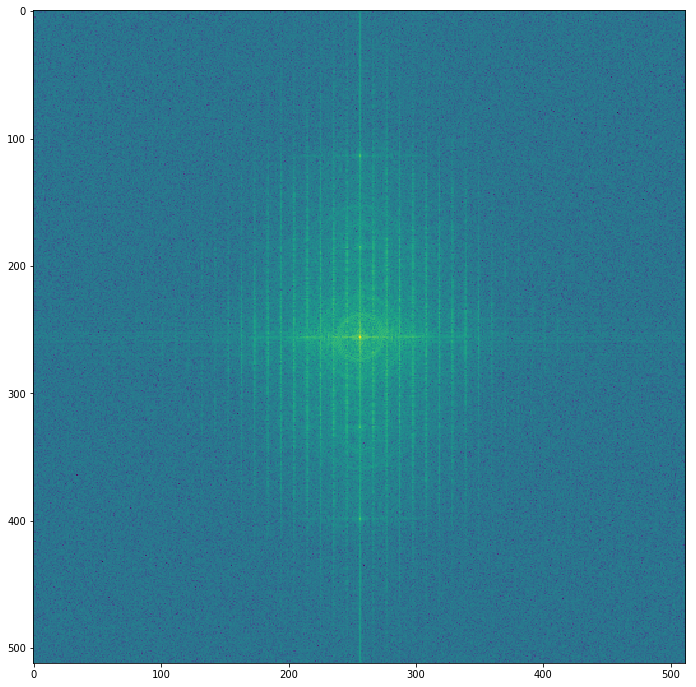

In [105]:
plt.figure(figsize=[12,12])
fimg=np.fft.fftshift(np.fft.fft2(cimg))
logf=np.log(np.abs(fimg))
plt.imshow(logf)

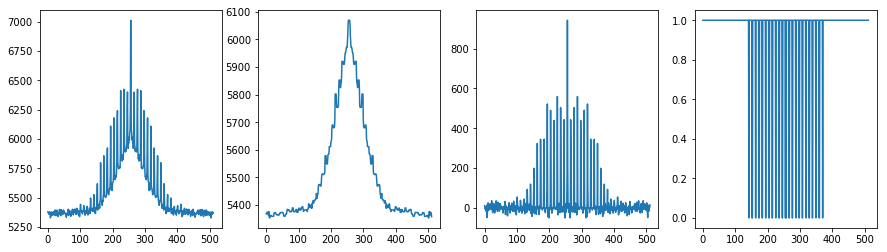

In [108]:

proj=logf.sum(axis=0)
plt.figure(figsize=[15,4])
plt.subplot(1,4,1)
plt.plot(proj)
plt.subplot(1,4,2)
baseline=sig.medfilt(proj,7)
plt.plot(baseline)
plt.subplot(1,4,3)
plt.plot(proj-baseline)
plt.subplot(1,4,4)
filter1d=((proj-baseline)<100).astype(float)
filter1d[256]=1 # Important 
plt.plot(filter1d)

Text(0.5,1,'Real space image')

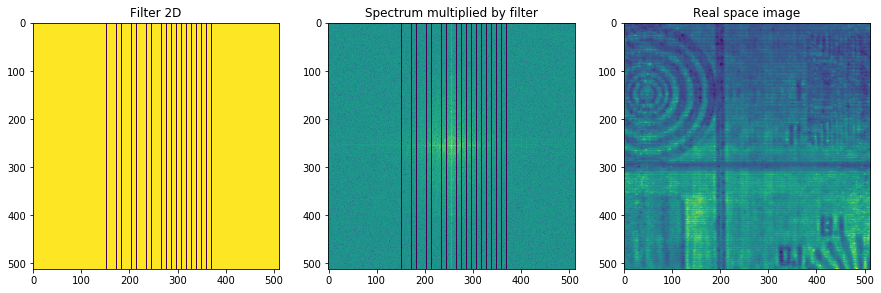

In [109]:
flt2d=np.matmul(np.ones((N,1)),filter1d.reshape(1,N))
plt.figure(figsize=[15,6])
plt.subplot(1,3,1)
plt.imshow(flt2d)
plt.title('Filter 2D')
plt.subplot(1,3,2)
ffimg=fimg*flt2d
plt.imshow(np.log(np.abs(ffimg)+1))
plt.title('Spectrum multiplied by filter')
plt.subplot(1,3,3)
final=np.abs(np.fft.ifft2(np.fft.fftshift(ffimg)))
plt.imshow(np.abs(final))
plt.title('Real space image')

Text(0.5,1,'Difference')

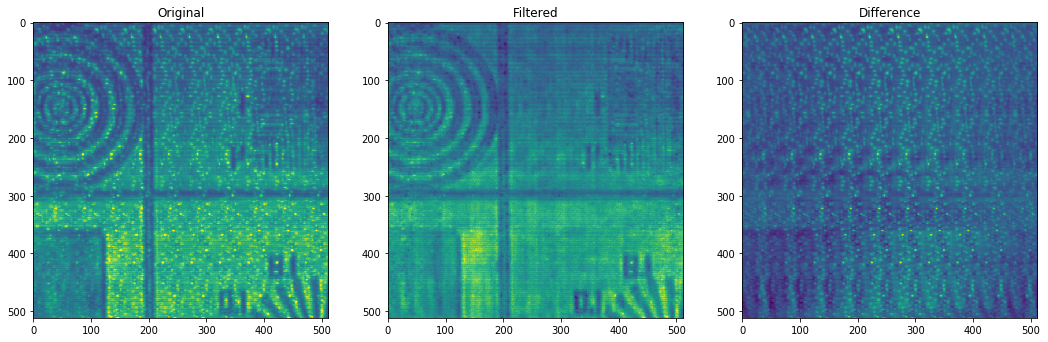

In [111]:
cax=[1000,6500]
plt.figure(figsize=[18,10])
plt.subplot(1,3,1)
plt.imshow(cimg,clim=cax)
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(final, clim=cax)
plt.title('Filtered')

plt.subplot(1,3,3)
plt.imshow(cimg-final)
plt.title('Difference')